In [1]:
import sqlite3
import pandas as pd
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
conn = sqlite3.connect("F:/education/data quest/cia factbook sql/factbook.db")
cursor = conn.cursor()
cursor.execute(q1).fetchall()

[('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)'),
 ('table',
  'facts',
  'facts',
  47,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float)')]

In [2]:
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


# # we have 2 tables named sqlite_master and facts

In [13]:
q="Select * from facts limit 5"
pd.read_sql_query(q,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [10]:
q2 ="select min(population) min_population , max(population) max_population, min(population_growth) min_population_growth, max(population_growth) max_population_growth from facts"
pd.read_sql_query(q2, conn)

,min_population,max_population,min_population_growth,max_population_growth
0,0,7256490011,0.0,4.02


In [15]:
q3='''select * from facts
where population=0'''
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None


# # the same query can be written as sub-query. let us look at the country with maximum population


In [16]:
q4='''select * from facts where population =(select max(population) from facts)'''
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


C:\Users\neil pradhan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


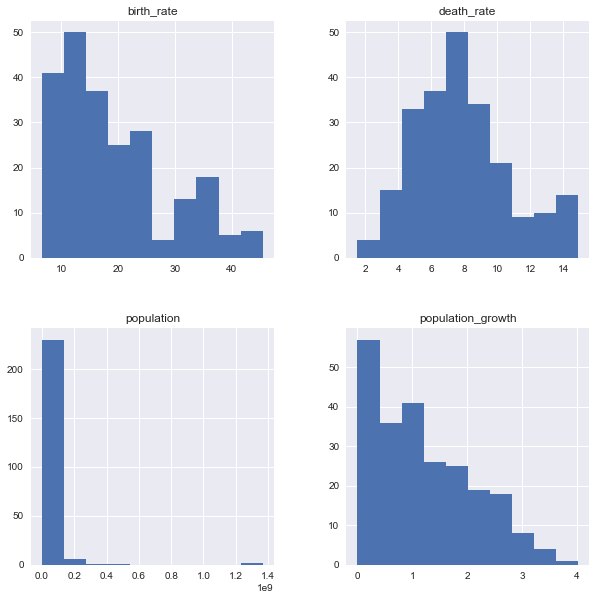

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select max(population) from facts)
and population != (select min(population) from facts)'''
pd.read_sql_query(q6,conn).hist(ax=ax)
plt.show()


# # to find country with highest population density we need to find the max ration of population to land area

In [38]:
q7="select cast(population as a float)/cast(area_land as a float) population_density from facts limit 20 "
pd.read_sql_query(q7,conn)

,population_density
0,49.927697
1,110.565662
2,16.602211
3,182.863248
4,15.741841
5,209.131222
6,15.870225
7,108.370812
8,2.961485
9,105.107041


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000025B97971358>],
      dtype=object)

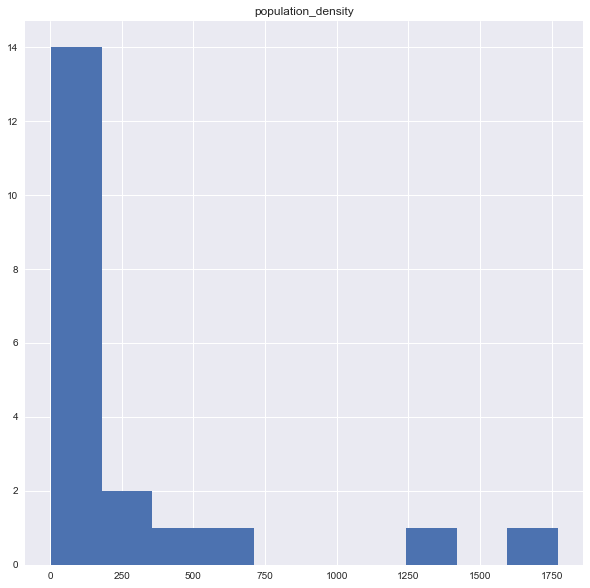

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(1,1,1)
q7="select cast(population as a float)/cast(area_land as a float) population_density from facts limit 20 "
pd.read_sql_query(q7,conn).hist(ax=ax)

# # Which countries have the highest ratios of water to land? Which countries have more water than land?(lets find countries having ratio more than the average

In [50]:
q8='''select name,cast(area_water as a float)/cast(area_land as a float) water_to_land 
from facts where water_to_land > (select avg(cast(area_water as a float)/cast(area_land as a float)) from facts) '''
pd.read_sql_query(q8,conn)

,name,water_to_land
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
